In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
electricity_price = pd.read_csv('/Users/leroy/Documents/GitHub/Electricity_trading/DART/Data/2023_24_ERCOT_forecast_actual_data_v3.csv')

electricity_price.columns

Index(['marketday', 'hourending', 'SP_Price_Houston', 'SP_Price_North',
       'SP_Price_Panh', 'SP_Price_South', 'SP_Price_West', 'DA_Price_Houston',
       'DA_Price_North', 'DA_Price_Panh', 'DA_Price_South', 'ERC_Wind_Total',
       'ERC_Load', 'ERC_Solar', 'ERC_NLoad', 'ERC_SLoad', 'ERC_WLoad',
       'ERC_HLoad', 'ERC_CWind', 'ERC_NWind', 'ERC_PWind', 'ERC_SWind',
       'ERC_WWind', 'ACTUAL_ERC_Load', 'ACTUAL_ERC_HLoad', 'ACTUAL_ERC_NLoad',
       'ACTUAL_ERC_SLoad', 'ACTUAL_ERC_WLoad', 'ACTUAL_ERC_CWind',
       'ACTUAL_ERC_NWind', 'ACTUAL_ERC_PWind', 'ACTUAL_ERC_SWind',
       'ACTUAL_ERC_Wind', 'ACTUAL_ERC_WWind', 'ACTUAL_ERC_Solar', 'Outage'],
      dtype='object')

In [28]:
houston = electricity_price.loc[:,['marketday', 'hourending','SP_Price_Houston','DA_Price_Houston','ACTUAL_ERC_Load', 'ACTUAL_ERC_HLoad', 'ACTUAL_ERC_NLoad',
                                    'ACTUAL_ERC_SLoad', 'ACTUAL_ERC_WLoad', 'ACTUAL_ERC_CWind',
                                    'ACTUAL_ERC_NWind', 'ACTUAL_ERC_PWind', 'ACTUAL_ERC_SWind',
                                    'ACTUAL_ERC_Wind', 'ACTUAL_ERC_WWind', 'ACTUAL_ERC_Solar']]

houston.loc[:,'houston_DART'] = houston.loc[:,'SP_Price_Houston'] - houston.loc[:,'DA_Price_Houston']

#plotting the data

houston


,marketday,hourending,SP_Price_Houston,DA_Price_Houston,ACTUAL_ERC_Load,ACTUAL_ERC_HLoad,ACTUAL_ERC_NLoad,ACTUAL_ERC_SLoad,ACTUAL_ERC_WLoad,ACTUAL_ERC_CWind,ACTUAL_ERC_NWind,ACTUAL_ERC_PWind,ACTUAL_ERC_SWind,ACTUAL_ERC_Wind,ACTUAL_ERC_WWind,ACTUAL_ERC_Solar,houston_DART
0,2/1/2023,1,36.2125,38.42,57103.0,11129.09,21582.79,16678.09,7712.58,2542.81,92.81,55.00,1283.81,4030.99,56.56,0.24,-2.2075
1,2/1/2023,2,34.2750,36.50,56574.0,10989.98,21404.36,16513.99,7665.68,2818.83,71.46,99.67,1010.19,4064.79,64.64,0.23,-2.2250
2,2/1/2023,3,34.4300,36.64,56369.0,10926.30,21286.48,16512.22,7644.05,3061.07,75.72,100.81,930.57,4210.19,42.02,0.23,-2.2100
3,2/1/2023,4,31.7350,37.17,56052.0,10989.15,21379.52,16436.49,7247.30,2864.80,88.80,60.16,1089.92,4151.20,47.52,0.23,-5.4350
4,2/1/2023,5,33.3625,39.09,56871.0,11295.20,21653.17,16528.84,7393.56,3047.25,104.76,71.55,1084.94,4331.33,22.83,0.24,-5.7275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,5/21/2024,20,153.4650,85.75,67236.0,17152.94,22240.70,19430.46,8412.25,2800.29,844.11,2056.90,2385.54,10727.49,2640.65,3108.64,67.7150
11250,5/21/2024,21,271.8250,83.13,65588.0,16762.87,21627.56,18971.92,8225.83,2527.68,1285.31,1648.69,2194.33,11291.14,3635.13,343.27,188.6950
11251,5/21/2024,22,109.8750,36.38,64071.0,16368.53,21090.59,18530.28,8081.51,2472.49,1453.58,1301.62,1952.18,12272.13,5092.26,0.09,73.4950
11252,5/21/2024,23,34.4375,27.88,60878.0,15636.55,19957.26,17274.83,8008.99,2307.74,1838.10,1258.82,2038.20,13963.83,6520.97,0.05,6.5575


In [31]:
#read pickle file
import pickle
with open('/Users/leroy/Documents/GitHub/Electricity_trading/DART/Data/GFS_forecast/forecast_20230203_on_20230202.pkl', 'rb') as f:
    data = pickle.load(f)

print(data.keys())

data['data'].shape

dict_keys(['variables', 'hour_forecast', 'prediction_date', 'data'])


(8, 16, 8, 9)

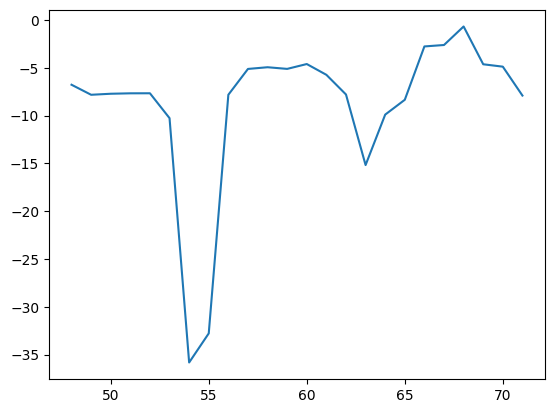

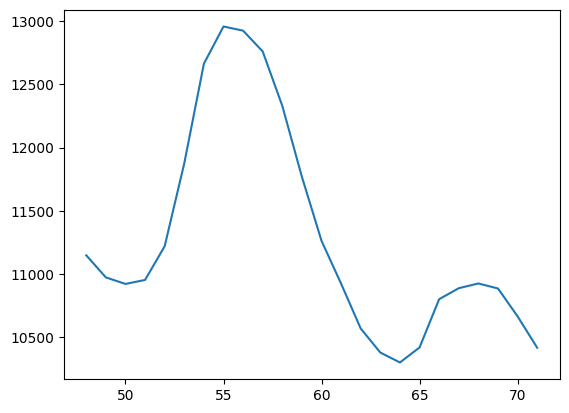

In [35]:
forcast_df = houston[(houston['marketday'] == '2/3/2023')].copy()

forcast_df.houston_DART.plot()
plt.show()

forcast_df.ACTUAL_ERC_HLoad.plot()
plt.show()